In [9]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from scipy.ndimage.filters import convolve, convolve1d, gaussian_filter
import math
from scipy import fftpack
from scipy.fftpack import fft2, ifft2, fftshift
import shutil
import seaborn as sns
import yaml
import shutil
import ultralytics
ultralytics.checks()
from ultralytics import YOLO


/tmp/ipykernel_39569/3379399903.py:6: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import convolve, convolve1d, gaussian_filter
/tmp/ipykernel_39569/3379399903.py:6: DeprecationWarning: Please import `convolve1d` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import convolve, convolve1d, gaussian_filter
/tmp/ipykernel_39569/3379399903.py:6: DeprecationWarning: Please import `gaussian_filter` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import convolve, convolve1d, gaussian_filter


In [36]:
train_data = '/home/madhu/Car_detection/raw_data/training_images'
train_csv = '/home/madhu/Car_detection/raw_data/train_solution_bounding_boxes (1).csv'
test_data = '/home/madhu/Car_detection/raw_data/testing_images'
root_dir = '/home/madhu/Car_detection/final_data'
labels_dir = '/home/madhu/Car_detection/final_data/labels'
images_dir = '/home/madhu/Car_detection/final_data/images'

## Pre-processing


Using medianBlur Filter

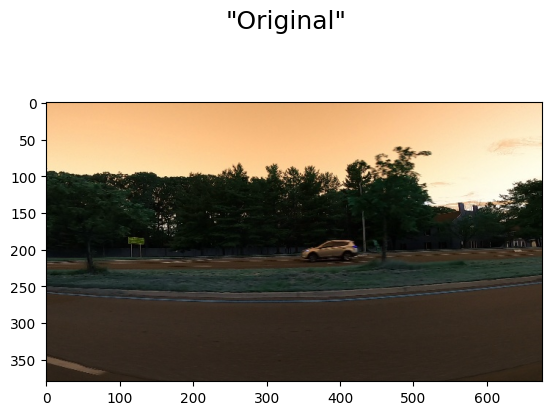

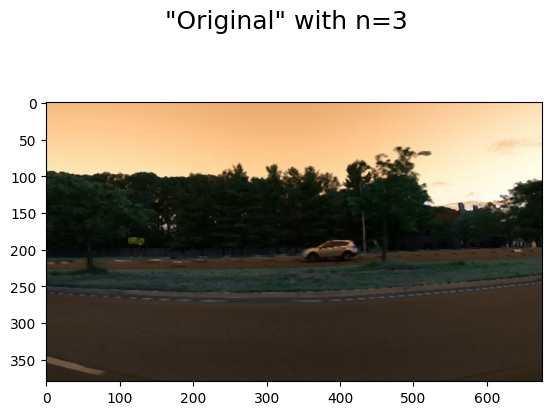

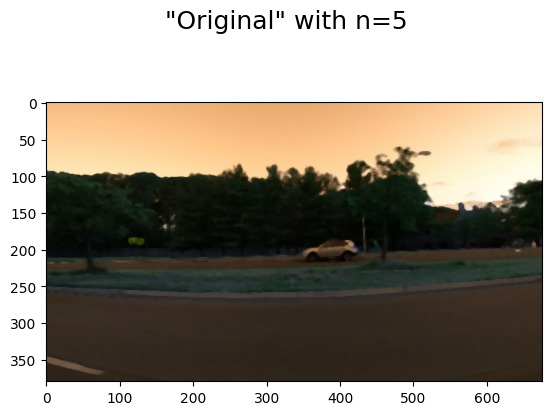

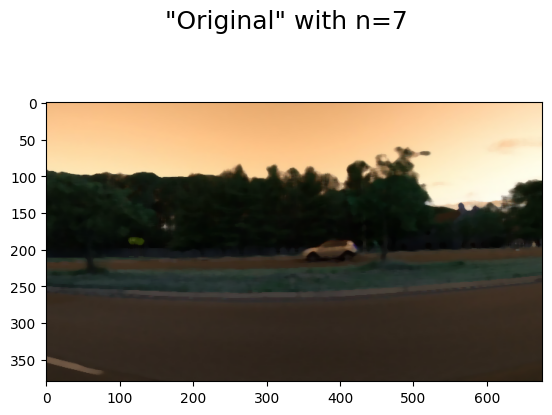

In [39]:
image = cv2.imread("/home/madhu/Car_detection/archive(1)/data/training_images/vid_4_29480.jpg")

fig = plt.figure()
fig.suptitle('"Original"', fontsize=18)
plt.imshow(image)

fig = plt.figure()
fig.suptitle('"Original" with n=3', fontsize=18)
plt.imshow(cv2.medianBlur(image,3))

fig = plt.figure()
fig.suptitle('"Original" with n=5', fontsize=18)
plt.imshow(cv2.medianBlur(image,5))

fig = plt.figure()
fig.suptitle('"Original" with n=7', fontsize=18)
plt.imshow(cv2.medianBlur(image,7))

Using Gaussian Blur Filter

In [42]:
def masc_gaus_1d(sigma, n):
    width = n//2
    dx = 1
    x = np.arange(-width, width)
    kernel_1d = np.exp(-(x ** 2) / (2 * sigma ** 2))
    kernel_1d = kernel_1d / (math.sqrt(2 * np.pi) * sigma)
    
    return kernel_1d

def masc_gaus_2d(sigma, n):
    width = n//2
    dx = 1
    dy = 1
    x = np.arange(-width, width)
    y = np.arange(-width, width)
    x2d, y2d = np.meshgrid(x, y)
    kernel_2d = np.exp(-(x2d ** 2 + y2d ** 2) / (2 * sigma ** 2))
    kernel_2d = kernel_2d / (2 * np.pi * sigma ** 2)
    
    return kernel_2d

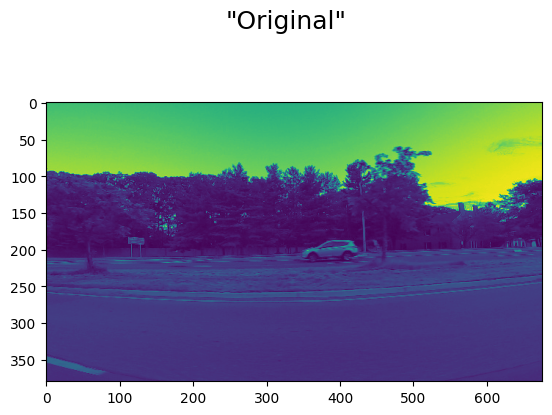

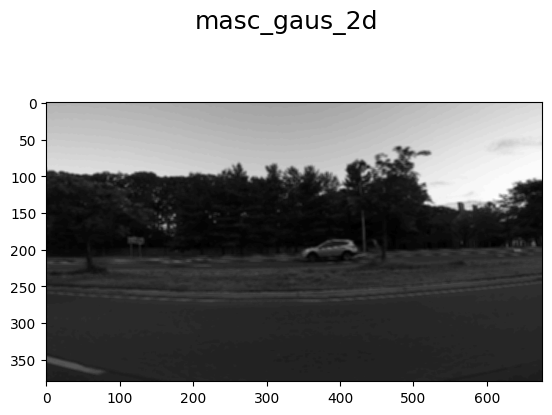

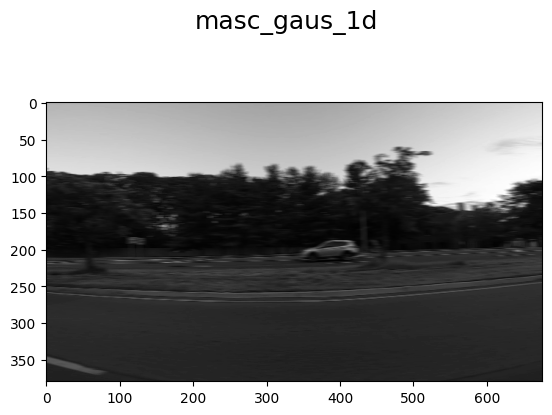

In [43]:
image = cv2.imread("/home/madhu/Car_detection/archive(1)/data/training_images/vid_4_29480.jpg", 0)

fig = plt.figure()
fig.suptitle('"Original"', fontsize=18)
plt.imshow(image)

kernel = masc_gaus_2d(sigma = 3, n = 5)
img_convolved = convolve(image, kernel)
fig = plt.figure()
fig.suptitle('masc_gaus_2d', fontsize=18)
plt.imshow(img_convolved,plt.cm.gray)

kernel1D = masc_gaus_1d(5,11)
img_convolved = convolve1d(image, kernel1D)
fig = plt.figure()
fig.suptitle('masc_gaus_1d', fontsize=18)
plt.imshow(img_convolved,plt.cm.gray)

Bilateral Filter

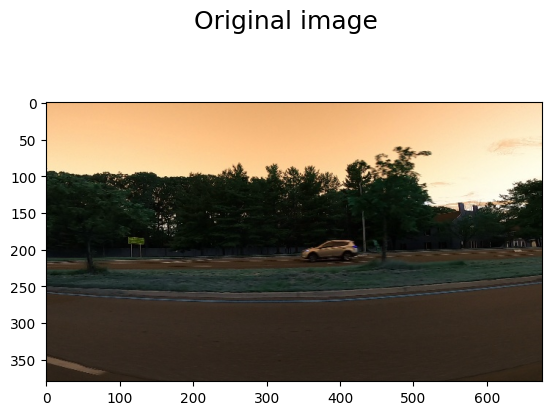

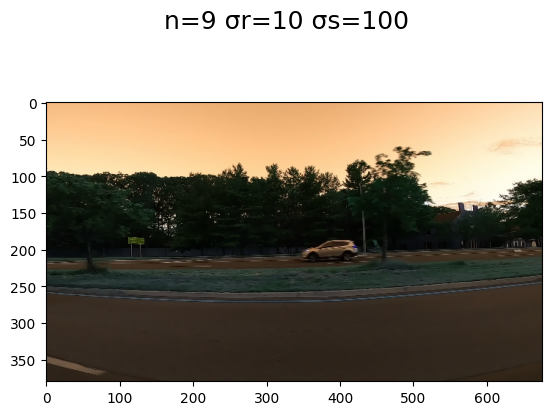

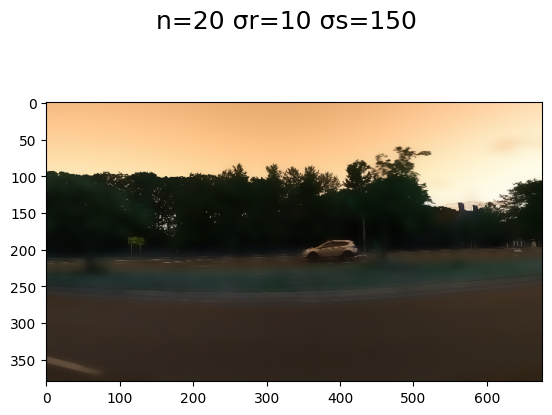

In [44]:
image = cv2.imread("/home/madhu/Car_detection/archive(1)/data/training_images/vid_4_29480.jpg")

fig = plt.figure()
fig.suptitle('Original image', fontsize=18)
plt.imshow(image)

fig = plt.figure()
fig.suptitle('n=9 σr=10 σs=100', fontsize=18)
plt.imshow(cv2.bilateralFilter(image,9,10,100))

fig = plt.figure()
fig.suptitle('n=20 σr=10 σs=150', fontsize=18)
plt.imshow(cv2.bilateralFilter(image,20,10,150))

# fig = plt.figure()
# fig.suptitle('n=9 σr=100 σs=10', fontsize=18)
# plt.imshow(cv2.bilateralFilter(image,9,100,10))

# fig = plt.figure()
# fig.suptitle('n=9 σr=100 σs=50', fontsize=18)
# plt.imshow(cv2.bilateralFilter(image,9,100,50))

# fig = plt.figure()
# fig.suptitle('n=20 σr=100 σs=10', fontsize=18)
# plt.imshow(cv2.bilateralFilter(image,20,100,10))

Fourier Based filter

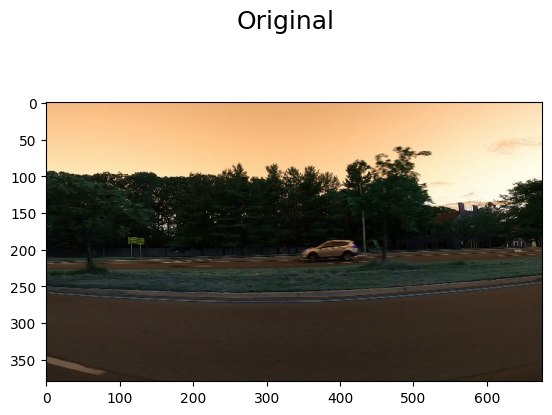

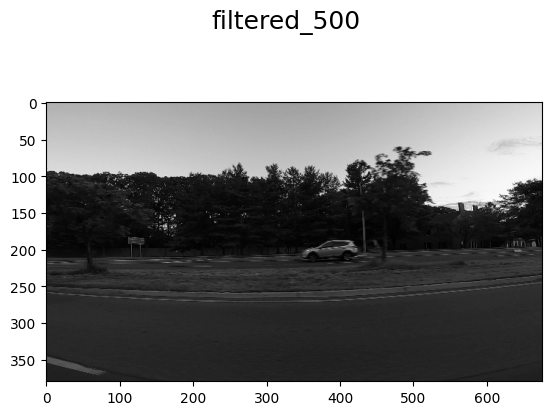

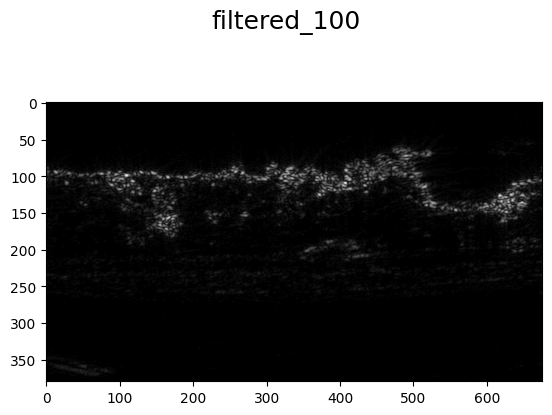

In [10]:

def apply_fourier_filter(image, filter_kernel):

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)    
    fft_image = fft2(gray_image)
    fft_image_shifted = fftshift(fft_image)
    filtered_fft = fft_image_shifted * filter_kernel
    filtered_image = np.abs(ifft2(filtered_fft))
    filtered_image = np.uint8(filtered_image)
    
    return filtered_image

image = cv2.imread('/home/madhu/Car_detection/archive(1)/data/training_images/vid_4_29480.jpg')

rows, cols = image.shape[:2]
crow, ccol = rows // 2 , cols // 2

def kernel_filter(radius):
    filter_kernel = np.zeros((rows, cols), np.float32)
    cv2.circle(filter_kernel, (crow, ccol), radius, 1, -1)
    return filter_kernel

filtered_image_500 = apply_fourier_filter(image, kernel_filter(500))

fig = plt.figure()
fig.suptitle('Original', fontsize=18)
plt.imshow(image)


fig = plt.figure()
fig.suptitle('filtered_500', fontsize=18)
plt.imshow(filtered_image_500, plt.cm.gray)

# Apply the Fourier filter
filtered_image_100 = apply_fourier_filter(image, kernel_filter(100))

fig = plt.figure()
fig.suptitle('filtered_100', fontsize=18)
plt.imshow(filtered_image_100, plt.cm.gray)



Apply median blur to all the images

In [8]:
path = '/home/madhu/Car_detection/archive(1)/data/training_images'
finaldata_path = '/home/madhu/Car_detection/pre-processed'

def normalize_image_intensity(image):
    image_float = image.astype(float)
    normalized_image = cv2.normalize(image_float, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
    return normalized_image

for filename in os.listdir(path):
    img = cv2.imread(os.path.join(path,filename))
    # img = normalize_image_intensity(img)
    img = cv2.medianBlur(img,7)
    cv2.imwrite(os.path.join(finaldata_path, filename), img)


Normalizing bounding boxes

In [45]:
df = pd.read_csv(train_csv)

width = 676
height = 380

df['class'] = 0
df.rename(columns = {'image':'image_name'}, inplace=True)

df['x_centre'] = (df['xmin']+df['xmax'])/2
df['y_centre'] = (df['ymin']+df['ymax'])/2
df['width'] = (df['xmax'] - df['xmin'])
df['height'] = (df['ymax'] - df['ymin'])

#normalising bounding box coordinates
df['x_centre'] = df['x_centre']/width
df['y_centre'] = df['y_centre']/height
df['width'] = df['width']/width
df['height'] = df['height']/height

df_yolo = df[['image_name', 'class', 'x_centre', 'y_centre', 'width', 'height']]
df_yolo.sample(5)

NameError: name 'train_csv' is not defined

Tain/Validation split

In [ ]:
img_list = list(sorted(os.listdir(train_data)))
np.random.shuffle(img_list)

for i, img_name in enumerate(img_list):
    subset ='train'
    if i >= 80/100 * len(img_list):
        subset = 'val'
    
    if np.isin(img_name, df_yolo['image_name']):
        columns = ['class', 'x_centre', 'y_centre', 'width', 'height']
        img_box = df[df['image_name'] == img_name][columns].values
        label_path = os.path.join(labels_dir, subset, img_name[:-4] + '.txt')
        with open(label_path , 'w+') as f:
            for row in img_box:
                text = " ".join(row.astype(str))
                f.write(text)
                f.write('\n')
                
    old_image_path = os.path.join(train_data, img_name)
    new_image_path = os.path.join(images_dir, subset, img_name)
    shutil.copy(old_image_path, new_image_path)
    
    

## Object Detection using YOLO-v8

Training


In [ ]:
model = YOLO('yolov8s.pt')
model

In [ ]:
yolo_format = dict(path = '/home/madhu/Car_detection/data',
                  train='/home/madhu/Car_detection/data/images/train',
                  val ='/home/madhu/Car_detection/data/images/val',
                  nc=1,
                  names={0:'car'})

with open('/kaggle/working/yolo.yaml', 'w') as outfile:
    yaml.dump(yolo_format, outfile, default_flow_style=False)

In [ ]:
model.train(data='/kaggle/working/yolo.yaml', epochs=20, patience=5, batch=16,
           lr0=0.001, imgsz=640)

In [ ]:
path_best_weights="/home/madhu/Car_detection/runs/detect/train4/weights/best.pt"
model = YOLO(path_best_weights) 

metrics = model.val() 

In [ ]:
print(f'mean average precision @ .50: {metrics.box.map50}')

## Making Predictions by using trained model


In [ ]:
with torch.no_grad():
    results = model.predict(source = test_data, conf=0.5, iou=0.75)

In [ ]:
prediction_dir = '/home/madhu/Car_detection/predictions'

In [ ]:
test_img_list=[]
for result in results:
    if len(result.boxes.xyxy):
        name=result.path.split("/")[-1].split(".")[0]
        boxes=result.boxes.xyxy.cpu().numpy()
        scores=result.boxes.conf.cpu().numpy()
        
        test_img_list.append(name)
        
        label_file_path=os.path.join(prediction_dir,name+".txt")
        with open(label_file_path,"w+") as f:
            for score,box in zip(scores,boxes):
                text=f"{score:0.4f} "+" ".join(box.astype(str))
                f.write(text)
                f.write("\n")

In [ ]:
def show_bbox(img,boxes,scores,axis,color=(0,255,0)):
    boxes=boxes.astype(int)
    scores=scores
    img=img.copy()
    for i,box in enumerate(boxes):
        score=f"{scores[i]:.4f}"
        cv2.rectangle(img,(box[0],box[1]),(box[2],box[3]),color,2)
        y=box[1]-10 if box[1]-10>10 else box[1]+10
        cv2.putText(img,score,(box[0],y),cv2.FONT_HERSHEY_SIMPLEX,0.5,color,2)
    
    axis.imshow(img)
    axis.axis("off")

fig,axes=plt.subplots(2,2,figsize=(12,12))
plt.subplots_adjust(wspace=0.1,hspace=0.1)
ax=axes.flatten()

imgs_name=np.random.choice(test_img_list,4)

for i,img_name in enumerate(imgs_name):
    img_file_path=os.path.join(test_data,img_name+".jpg")
    img=cv2.imread(img_file_path)
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    
    label_file_path=os.path.join(prediction_dir,img_name+".txt")
    label=pd.read_csv(label_file_path,sep=" ",header=None).values
    scores=label[:,0]
    boxes=label[:,1:]
    show_bbox(img,boxes,scores,axis=ax[i])
    
plt.savefig("car.png")